**PROBLEM STATEMENT**
- This dataset contains the marks of students in percentage and the subjects are ML, Excel, Python, Tableau and SQL. We need to preddict a model that will evaluate based on given data that what are the chances of a particular student getting placement.
- This problem has been taken from Kaggle

Importing required modules

In [60]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data

In [61]:
df = pd.read_csv('scores.csv')
df.head()

,Python,Sql,ML,Tableau,Excel,Student Placed
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Python          200 non-null    float64
 1   Sql             200 non-null    float64
 2   ML              200 non-null    float64
 3   Tableau         200 non-null    float64
 4   Excel           200 non-null    float64
 5   Student Placed  200 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


From above information it is evident that:
- This data contains 200 instances and 6 columns out of which 5 are the features and 1 is the target
- All the feature columns are of float data type and target is of object data type
- There is no missing value in the dataset

In [63]:
df.describe()

,Python,Sql,ML,Tableau,Excel
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.514100,0.495850,0.514350,0.495150,0.474950
std,0.305749,0.290694,0.285211,0.292463,0.281686
min,0.000000,0.010000,0.000000,0.010000,0.000000
25%,0.237500,0.227500,0.267500,0.240000,0.227500
50%,0.545000,0.490000,0.540000,0.500000,0.485000
75%,0.800000,0.740000,0.770000,0.740000,0.702500
max,1.000000,1.000000,1.000000,1.000000,0.990000


In [64]:
colname = df.select_dtypes("float64").columns
colname

Index(['Python', 'Sql', 'ML', 'Tableau', 'Excel'], dtype='object')

From above information it is evident that:
- There is slight left side skewness in Python column as the median value is greater the the mean, but it is very marginal and is manageable
- There is slight left side skewness again in ML column but it is very marginal
-  Sql, Tableau and Excel columns are almost symmetric and shows normal Distribution.
- Also, the column to column variance is very less as the standard deviation value is almost constant. 

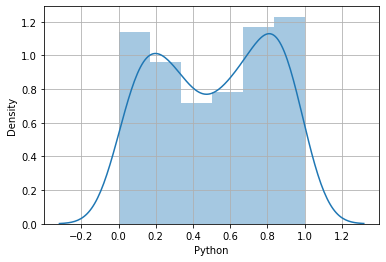

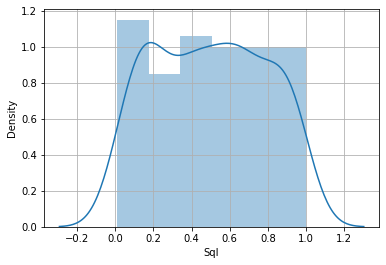

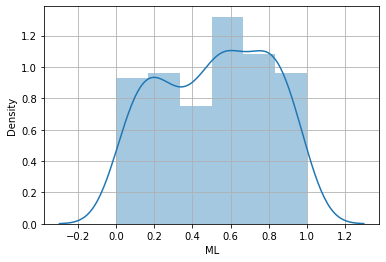

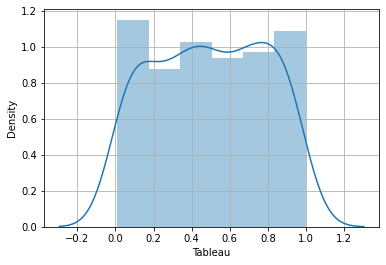

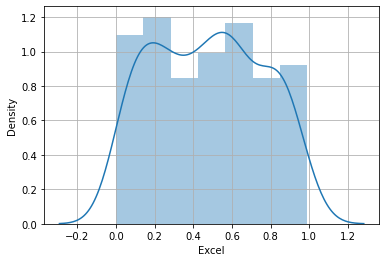

In [65]:
for col in colname:
  plt.figure()
  sns.distplot(df[col])
  plt.grid()

In [66]:
df.corr()

,Python,Sql,ML,Tableau,Excel
Python,1.000000,-0.063001,-0.012555,0.009743,0.025097
Sql,-0.063001,1.000000,0.066411,0.009267,0.075509
ML,-0.012555,0.066411,1.000000,0.039491,-0.084854
Tableau,0.009743,0.009267,0.039491,1.000000,-0.052293
Excel,0.025097,0.075509,-0.084854,-0.052293,1.000000


There are almost no correlation among the features which is good for a best fit model

In [67]:
df.corr().style.background_gradient()

,Python,Sql,ML,Tableau,Excel
Python,1.000000,-0.063001,-0.012555,0.009743,0.025097
Sql,-0.063001,1.000000,0.066411,0.009267,0.075509
ML,-0.012555,0.066411,1.000000,0.039491,-0.084854
Tableau,0.009743,0.009267,0.039491,1.000000,-0.052293
Excel,0.025097,0.075509,-0.084854,-0.052293,1.000000


From above Gradient chart it is evident that there is almost no correlation among the columns.

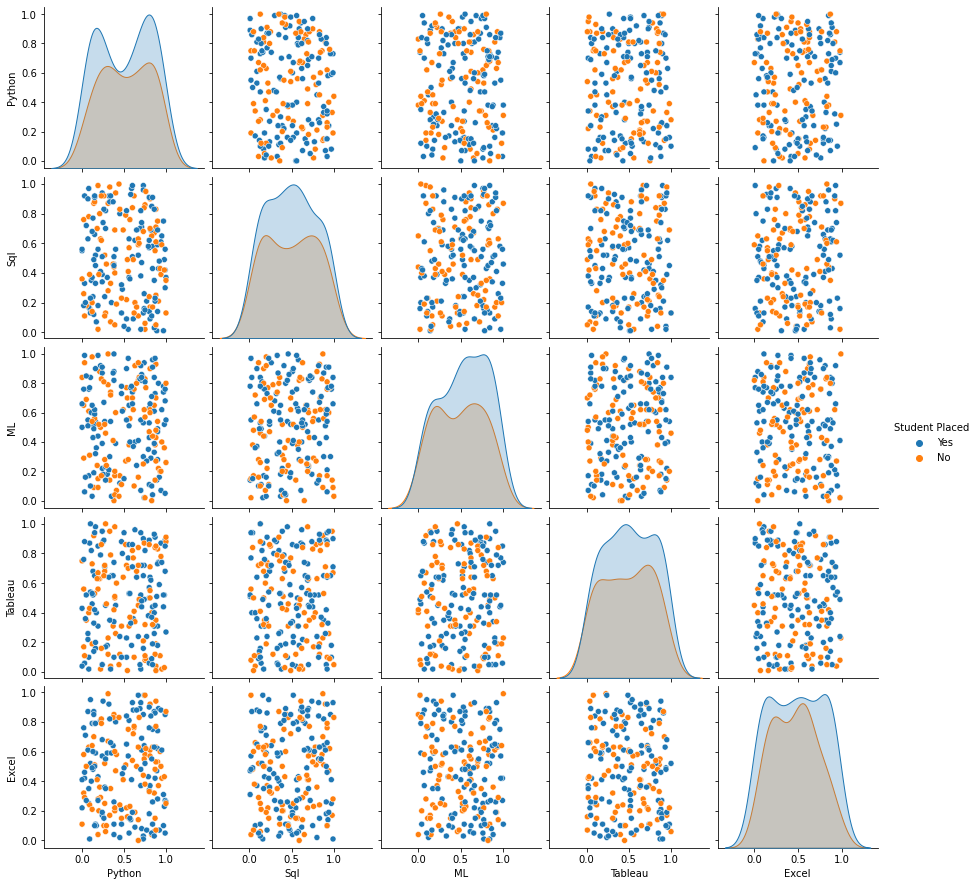

In [68]:
sns.pairplot(df, hue="Student Placed")

From above pairplot, we can see that the data is not linearly separable via a hyperplane and the ditribution is not forming any pattern

Splitting the data into features and target for model preparation and evaluation

In [69]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

Checking the distribution of target variables

In [70]:
y.value_counts()

Yes    116
No      84
Name: Student Placed, dtype: int64

**Model Preparation:**
- The problem at hand is a classification problem and we will prepare several models to find the Best Accuracy, best fit model, good recall and f1 score

In [71]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =  train_test_split(x, y, test_size = 0.25, random_state=1, stratify=y)

Since there is no proper distribution of target variables, we are stratifying the values to split equal values of both the variables into test and train datasets

STEP 1: Importing relevant classes required for model building

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score

STEP 2: Model Creation
- We have prepared a function for model building, this will avoid unnecessary model creation for different algorithms

In [73]:
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)

  train = model.score(xtrain, ytrain)
  test = model.score(xtest, ytest)

  print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
  print(classification_report(ytest, ypred))

Creating KNearestNeighbors Model

In [74]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.6533333333333333
Testing Accuracy : 0.54


              precision    recall  f1-score   support

          No       0.44      0.33      0.38        21
         Yes       0.59      0.69      0.63        29

    accuracy                           0.54        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.52      0.54      0.53        50



Tuning the Model using Hyperparameters

In [75]:
trainac = []
testac = []

for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain, ytrain)

  train = knn.score(xtrain, ytrain)
  test = knn.score(xtest, ytest)

  trainac.append(train)
  testac.append(test)

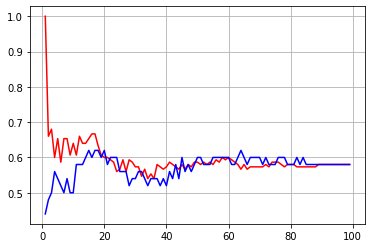

In [76]:
plt.plot(range(1,100), trainac, color="red")
plt.plot(range(1,100), testac, color="blue")
plt.grid()

From above chart we see that the best fit model with high accuracy can be evaluated at n_neighbor value as 17

In [77]:
knn = mymodel(KNeighborsClassifier(n_neighbors = 15))

Training Accuracy : 0.6533333333333333
Testing Accuracy : 0.62


              precision    recall  f1-score   support

          No       0.62      0.24      0.34        21
         Yes       0.62      0.90      0.73        29

    accuracy                           0.62        50
   macro avg       0.62      0.57      0.54        50
weighted avg       0.62      0.62      0.57        50



We have tuned the model with Best fit coming at 66% training accuracy and 62% testing accuracy which is quite acceptable

Creating Logistic Regression Model

In [78]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.6
Testing Accuracy : 0.54


              precision    recall  f1-score   support

          No       0.00      0.00      0.00        21
         Yes       0.56      0.93      0.70        29

    accuracy                           0.54        50
   macro avg       0.28      0.47      0.35        50
weighted avg       0.33      0.54      0.41        50



Tuning the model using Hyerparameters

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "C" : np.logspace(-3,3,7),
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [80]:
grid = GridSearchCV(LogisticRegression(),
                    parameters,
                    verbose=3,
                    cv=5,
                    scoring="accuracy")

In [81]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.400 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [82]:
grid.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

Best is found on above hyperparameters

In [83]:
grid.best_score_

0.5799999999999998

Best possible accuracy achievable

In [84]:
grid.best_estimator_

LogisticRegression(C=0.001, penalty='l1', solver='saga')

Training the model on the best estimators to get Best fit model

In [85]:
logreg = grid.best_estimator_
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))

Training Accuracy : 0.58
Testing Accuracy : 0.58


              precision    recall  f1-score   support

          No       0.00      0.00      0.00        21
         Yes       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



From above we get Low Bias, Low variance model which the best possible fit

Creating Support Vector Machine Model

In [86]:
svm = mymodel(SVC())

Training Accuracy : 0.68
Testing Accuracy : 0.56


              precision    recall  f1-score   support

          No       0.40      0.10      0.15        21
         Yes       0.58      0.90      0.70        29

    accuracy                           0.56        50
   macro avg       0.49      0.50      0.43        50
weighted avg       0.50      0.56      0.47        50



In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.fit_transform(xtest)

In [88]:
from sklearn.model_selection import GridSearchCV

parameter = {
    "C" : [0.1,1,10],
    "gamma" : [0.1, 0.01, 0.001],
    "kernel" : ["rbf"]
}

grid = GridSearchCV(SVC(), parameter, verbose=2)
grid.fit(xtrain, ytrain) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [89]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Best is found on above hyperparameters

In [90]:
grid.best_score_

0.5799999999999998

Best possible accuracy achievable

In [91]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

In [92]:
svc = grid.best_estimator_
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)

train = svc.score(xtrain, ytrain)
test = svc.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))

Training Accuracy : 0.58
Testing Accuracy : 0.58


              precision    recall  f1-score   support

          No       0.00      0.00      0.00        21
         Yes       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



Creating Decision Tree Model

In [93]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.52


              precision    recall  f1-score   support

          No       0.42      0.38      0.40        21
         Yes       0.58      0.62      0.60        29

    accuracy                           0.52        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.51      0.52      0.52        50



In [94]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1,50,5)),
    "min_samples_leaf": list(range(1,50,5))
}

In [95]:
from sklearn. model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [96]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}

Best is found on above hyperparameters

In [97]:
grid.best_score_

0.5799999999999998

Best possible accuracy achievable

In [98]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1)

Since from above models we conclude that KNearestNeighbor Model gives the best possible fit with Optimum accurracy we select KNN Model for the Basis of future predictions

In [99]:
dt = grid.best_estimator_
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

train = dt.score(xtrain, ytrain)
test = dt.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))

Training Accuracy : 0.58
Testing Accuracy : 0.58


              precision    recall  f1-score   support

          No       0.00      0.00      0.00        21
         Yes       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



Thus we conclude that the best fit model from above all models is the KNearestNeighbors Model which gives us a Training Accuracy of 65.3% and Testing Accuracy of 62.5%